In [483]:
# handling data 
import os
import numpy as np 
import pandas as pd 
import random
import gender_guesser.detector as gender

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import ensemble
from sklearn import metrics

In [484]:
df = pd.read_csv('../data/raw_data.csv')
df.head()

,Name,networth,category,gender,profile_pic,age,DOB,nationality,education,marital_status,source_of_wealth,birth_place,personal_details,profile_link
0,Andrew Carnegie,$310 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"November 25, 1835",United States-Scotland,NaN,Widowed (Louise Whitfield Carnegie),Carnegie Steel Company,"Dunfermline, United Kingdom",Scottish-American businessman Andrew Carnegie ...,https://www.therichest.com/celebnetworth/celeb...
1,Henry Ford,$199 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"July 30, 1863",United States,Detroit Business Institute,Widowed (Clara Ala Bryant ),Ford Motor Company,"Greenfield Township, Wayne County, Michigan",American industrialist and businessman Henry F...,https://www.therichest.com/celebnetworth/celeb...
2,Jeff Bezos,$196 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,57.0,"January 12, 1964",United States,"Princeton University, River Oaks Elementary Sc...",Divorced (Mackenzie Bezos),Internet retailing (Amazon),"Albuquerque, New Mexico",Jeffrey Preston Bezos is an American entrepren...,https://www.therichest.com/celebnetworth/celeb...
3,Cornelius Vanderbilt,$185 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"May 27, 1794",American,NaN,Married,ship and railroad business,"Staten Island, New York",Cornelius Vanderbilt was an American entrepren...,https://www.therichest.com/celebnetworth/celeb...
4,Elon Musk,$163.9 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,49.0,"June 28, 1971",United States,"Pretoria Boys High School, Queen's University,...","Divorced (Justine Wilson, Talulah Riley)","SpaceX, Tesla Motors and PayPal","Pretoria, South Africa",Elon Reeve Musk is a South African born busine...,https://www.therichest.com/celebnetworth/celeb...


In [485]:
nation_df = pd.read_csv('../data/nation_mapping.csv')
nation_df.set_index('nationality', inplace= True)
nation_df.head()

,nation
nationality,
Aalborgenser,Aalborg
Aberdonian,Aberdeen
Abkhaz,Abkhazia
Abkhazian,Abkhazia
Abrenian,Abra


In [486]:
nation_mapping_dict = nation_df.to_dict()['nation']
nation_mapping_dict

{'Aalborgenser': 'Aalborg',
 'Aberdonian': 'Aberdeen',
 'Abkhaz': 'Abkhazia',
 'Abkhazian': 'Abkhazia',
 'Abrenian': 'Abra',
 'Abruzzese': 'Abruzzo',
 'Abyssinian': 'Abyssinia',
 'Acadian': 'Acadia',
 'Acadien': 'Acadie',
 'Acadienne': 'Acadie',
 'Acarnanian': 'Acarnania',
 'Acehnese': 'Aceh',
 'Achaean': 'Achaea',
 'Acreano': 'Acre',
 'Adelaidean': 'Adelaide',
 'Adelaidian': 'Adelaide',
 'Aeginetan': 'Aegina',
 'Aethaean': 'Aethaea',
 'Aetolian': 'Aetolia',
 'Afghan': 'Afghanistan',
 'African': 'Africa',
 'Afro-Eurasian': 'Afro-Eurasia',
 'Agote': 'Navarra',
 'Aguascalentense': 'Aguascalientes',
 'Akkadian': 'Akkadia',
 'Aklan': 'Aklan',
 'Aklanese': 'Aklan',
 'Aklanon': 'Aklan',
 'Akronite': 'Akron',
 'Alabamian': 'Alabama',
 'Alagoano': 'Alagoas',
 'Åland Island': 'Åland Islands',
 'Ålandish': 'Åland',
 'Alaskan': 'Alaska',
 'Alavense': 'Álava',
 'Alavés': 'Álava',
 'Albaceteño': 'Albacete',
 'Albacetense': 'Albacete',
 'Albanense': 'Albacete',
 'Albanian': 'Albania',
 'Albasitense'

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20195 entries, 0 to 20194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              20195 non-null  object 
 1   networth          19386 non-null  object 
 2   category          20195 non-null  object 
 3   gender            19280 non-null  object 
 4   profile_pic       20022 non-null  object 
 5   age               16731 non-null  float64
 6   DOB               18062 non-null  object 
 7   nationality       20033 non-null  object 
 8   education         13158 non-null  object 
 9   marital_status    16825 non-null  object 
 10  source_of_wealth  19829 non-null  object 
 11  birth_place       18337 non-null  object 
 12  personal_details  20082 non-null  object 
 13  profile_link      19638 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.2+ MB


In [488]:
print('shape of the dataframe : {}'.format(df.shape))
old_row = df.shape[0]

shape of the dataframe : (20195, 14)


In [489]:
df.isnull().sum()

Name                   0
networth             809
category               0
gender               915
profile_pic          173
age                 3464
DOB                 2133
nationality          162
education           7037
marital_status      3370
source_of_wealth     366
birth_place         1858
personal_details     113
profile_link         557
dtype: int64

In [490]:
df.columns

Index(['Name', 'networth', 'category', 'gender', 'profile_pic', 'age', 'DOB',
       'nationality', 'education', 'marital_status', 'source_of_wealth',
       'birth_place', 'personal_details', 'profile_link'],
      dtype='object')

Only 10393 names are unique, rest are repeating in for different categories so we drop the duplicate names 

In [491]:
len(df.Name.unique())

10393

In [492]:
df.drop_duplicates(subset=['Name'], inplace= True)

In [493]:
df.describe()

,age
count,8646.000000
mean,53.360976
std,25.316217
min,-1.000000
25%,40.000000
50%,51.000000
75%,64.000000
max,1824.000000


## Feature Engineering :

#### Age : 

In [494]:
df.age.sort_values(ascending=False).head(100)

11108    1824.0
2162      174.0
2365      133.0
910       128.0
6555      117.0
          ...  
5540       94.0
2610       94.0
10479      94.0
9607       94.0
3378       94.0
Name: age, Length: 100, dtype: float64

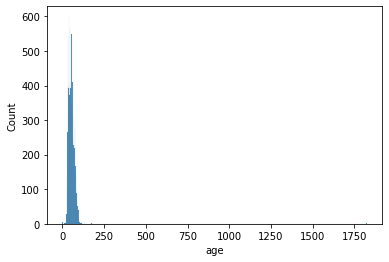

In [495]:
sns.histplot(df.age);

In [496]:
fig = px.box(df, x = 'age')
fig.show()

In [497]:
df[df.age.isnull()].head()

,Name,networth,category,gender,profile_pic,age,DOB,nationality,education,marital_status,source_of_wealth,birth_place,personal_details,profile_link
0,Andrew Carnegie,$310 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"November 25, 1835",United States-Scotland,NaN,Widowed (Louise Whitfield Carnegie),Carnegie Steel Company,"Dunfermline, United Kingdom",Scottish-American businessman Andrew Carnegie ...,https://www.therichest.com/celebnetworth/celeb...
1,Henry Ford,$199 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"July 30, 1863",United States,Detroit Business Institute,Widowed (Clara Ala Bryant ),Ford Motor Company,"Greenfield Township, Wayne County, Michigan",American industrialist and businessman Henry F...,https://www.therichest.com/celebnetworth/celeb...
3,Cornelius Vanderbilt,$185 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"May 27, 1794",American,NaN,Married,ship and railroad business,"Staten Island, New York",Cornelius Vanderbilt was an American entrepren...,https://www.therichest.com/celebnetworth/celeb...
5,The Mars Family,$127 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,NaN,United States,NaN,NaN,"Food (Candy, Pet Food, Chocolates)",NaN,"Frank C. Mars was the creator of Mars company,...",https://www.therichest.com/celebnetworth/celeb...
8,John Jacob Astor,$121 Billion,Business,Male,https://static1.therichestimages.com/wordpress...,NaN,"July 13, 1864",American,Harvard University,Married,business,"Rhinebeck, New York","John Jacob Astor was an American businessman, ...",https://www.therichest.com/celebnetworth/celeb...


> We can fill the missing values using DOB. but the issue is that few people was born in 1000s. so taking their current wouldn't be right. <br>
for such cases if the current age of a person turns out to be >100 we will be filling that with the mode value.

> As we can see few people are of age > 120 where the highest recorded age for a human being is 120 so we fill that with the median value

In [498]:
median_age = df.age.mode()
for i in range(len(df)) : 
    if np.isnan(df.age.iloc[i]): 
        try :
            current_age = 2022 - int(df.DOB.iloc[i][-4:])
            if current_age > 100 :
                df.age.iloc[i] = median_age
            else : 
                df.age.iloc[i] = current_age
        except :
            df.age.iloc[i] = median_age
    elif int(df.age.iloc[i]) > 120 : 
        df.age.iloc[i] = median_age

print("# NUll values in age feature : {}".format(df.age.isnull().sum()))

# NUll values in age feature : 0


### Profile link : 

In [499]:
for i in range(len(df)) : 
    if df.profile_link.iloc[i] is np.nan : 
        df.profile_link.iloc[i] = df.personal_details.iloc[i]
        df.personal_details.iloc[i] = np.nan

In [500]:
df.profile_link.isnull().sum()

0

In [501]:
df.personal_details.isnull().sum()

333

### Gender :

In [502]:
df.gender.isnull().sum()

449

In [503]:
df.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [504]:
gd = gender.Detector()
for i in range(len(df)) : 
    if df.gender.iloc[i] is np.nan: 
        first_name = df.Name.iloc[i].split(' ')[0]
        gender_guess = gd.get_gender(first_name.capitalize())
        if gender_guess == 'mostly_male' :
            gender_guess = 'Male'
        elif gender_guess == 'mostly_female' :
            gender_guess = 'Female'
        df.gender.iloc[i] = gender_guess.capitalize()

df.gender.isnull().sum()

0

In [505]:
df.gender.unique()

array(['Male', 'Female', 'Unknown', 'Andy'], dtype=object)

In [506]:
df = df[(df.gender != 'Unknown') & (df.gender != 'Andy')]

### Nationality : 

In [507]:
print('Total nations avialable in the dataset {}'.format(len(df.nationality.unique())))

Total nations avialable in the dataset 511


In [508]:
df.nationality.isnull().sum()

85

> america and United states are same so we fill the missing values with united states and convert american to united states

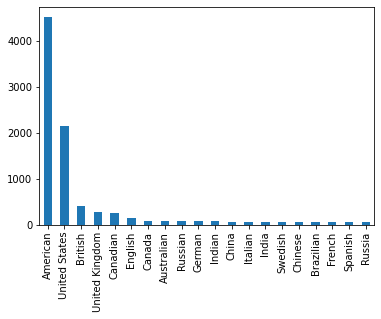

In [509]:
df.nationality.value_counts().head(20).plot(kind= 'bar');

In [510]:
prev_len = 1
curr_len = 0
while curr_len < prev_len : 
    prev_len = len(df.nationality.unique())
    for i in range(len(df)) : 
        if not df.nationality.iloc[i] is np.nan : 
            if (df.nationality.iloc[i] == 'United States Of America') or (df.nationality.iloc[i] == 'Untied States') or (df.nationality.iloc[i] == 'United  States') or (df.nationality.iloc[i] == 'United Stated') or (df.nationality.iloc[i] == 'Americna'):  
                df.nationality.iloc[i] = 'United States'
            elif 'United States' in df.nationality.iloc[i] : 
                df.nationality.iloc[i] = 'United States'
            elif (df.nationality.iloc[i] == 'Canadian') or (df.nationality.iloc[i] ==  'Candian') or (df.nationality.iloc[i] == 'Canadian (Dual citizenship)') or (df.nationality.iloc[i] == 'Canadian (dual)'): 
                df.nationality.iloc[i] = 'Canada'
            elif (df.nationality.iloc[i] == 'Englsih') or (df.nationality.iloc[i] ==  'England') or (df.nationality.iloc[i] == 'London England'): 
                df.nationality.iloc[i] = 'United Kingdom'
            elif df.nationality.iloc[i] == 'United Kindom': 
                df.nationality.iloc[i] = 'United Kingdom'
            elif (df.nationality.iloc[i] == 'german') or (df.nationality.iloc[i] == 'germani'): 
                df.nationality.iloc[i] = 'germany'
            elif (df.nationality.iloc[i] == 'Saudi Arabian') or (df.nationality.iloc[i] == 'emirati') or (df.nationality.iloc[i] == 'arabian') or (df.nationality.iloc[i] == 'United Arab Emirates') or (df.nationality.iloc[i] == 'Arabian'): 
                df.nationality.iloc[i] = 'Saudi Arabia'
            elif (df.nationality.iloc[i] == 'kazakhstanian') or (df.nationality.iloc[i] == 'kazakh'): 
                df.nationality.iloc[i] = 'kazakhstan'
            elif (df.nationality.iloc[i] == 'uruguayian') or (df.nationality.iloc[i] == 'uruguayan') : 
                df.nationality.iloc[i] = 'uruguay'
            elif (df.nationality.iloc[i] == 'Argentinian') or (df.nationality.iloc[i] == 'Argentine'): 
                df.nationality.iloc[i] = 'Argentina'
            elif (df.nationality.iloc[i] == 'The Netherlands'): 
                df.nationality.iloc[i] = 'Netherlands'
            elif (df.nationality.iloc[i] == 'ZImbabwean'): 
                df.nationality.iloc[i] = 'Zimbabwe'
            elif (df.nationality.iloc[i] == 'Northern Ireland'): 
                df.nationality.iloc[i] = 'Ireland'
            elif (df.nationality.iloc[i] == 'Israeli'): 
                df.nationality.iloc[i] = 'Israel'
            elif (df.nationality.iloc[i] == 'Filipina'): 
                df.nationality.iloc[i] = 'Philippines'
            elif (df.nationality.iloc[i] == 'South Sudan'): 
                df.nationality.iloc[i] = 'Sudan'
            elif (df.nationality.iloc[i] == 'Stateless'): 
                df.nationality.iloc[i] = np.nan
            elif ('1953' in df.nationality.iloc[i]): 
                print(df.nationality.iloc[i])
                df.nationality.iloc[i] = np.nan
            elif 'United Kingdom' in df.nationality.iloc[i] : 
                df.nationality.iloc[i] = 'United Kingdom'
            elif ('America' in df.nationality.iloc[i]) or (df.nationality.iloc[i] == 'Ameican') : 
                df.nationality.iloc[i] = 'United States'
            elif '-' in df.nationality.iloc[i] : 
                nation = df.nationality.iloc[i].split('-')[-1].strip()
                if nation == 'American' :
                    nation = 'United States'
                df.nationality.iloc[i] = nation
            elif '/' in df.nationality.iloc[i] : 
                nation = df.nationality.iloc[i].split('/')[-1].strip()
                if nation == 'American' :
                    nation = 'United States'
                df.nationality.iloc[i] = nation
            elif ',' in df.nationality.iloc[i] : 
                nation = df.nationality.iloc[i].split(',')[0].strip()
                if nation == 'American' :
                    nation = 'United States'
                df.nationality.iloc[i] = nation
            elif ' and ' in df.nationality.iloc[i] : 
                nation = df.nationality.iloc[i].split(' and ')[-1].strip() 
                df.nationality.iloc[i] = nation
            elif ' And ' in df.nationality.iloc[i] : 
                nation = df.nationality.iloc[i].split(' And ')[-1].strip() 
                df.nationality.iloc[i] = nation
            elif df.nationality.iloc[i] in nation_mapping_dict.keys() : 
                df.nationality.iloc[i] = nation_mapping_dict[df.nationality.iloc[i]]
        else : 
            df.nationality.iloc[i] = 'United States'
    curr_len = len(df.nationality.unique())
    print(prev_len, curr_len)

28-02-1953
511 178
178 139
139 138
138 138


In [511]:
print('Total number of nations after preprocessing {}'.format(len(df.nationality.unique())))

Total number of nations after preprocessing 138


In [512]:
df.nationality.unique()

array(['United States', 'France', 'Spain', 'Mexico', 'India', 'Sweden',
       'China', 'Italy', 'Japan', 'Columbian', 'Canada', 'Hong Kong',
       'Germany', 'Russia', 'Brazil', 'Ireland', 'United Kingdom',
       'Netherlands', 'Thailand', 'Azerbaijan', 'Finland', 'Korean',
       'Switzerland', 'Australia', 'Nigeria', 'Chile', 'Saudi Arabia',
       'Austria', 'Denmark', 'Czech Republic', 'Colombia', 'Israel',
       'Indonesia', 'Singapore', 'South Africa', 'South Korea', 'Cyprus',
       'Taiwan', 'Vietnam', 'Argentina', 'Philippines', 'New Zealand',
       'Swaziland', 'Egypt', 'Malaysia', 'Georgia', 'Belgium', 'Norway',
       'Portugal', 'Poland', 'Angola', 'Algeria', 'Turkey', 'Lebanon',
       'Ukraine', 'Zimbabwe', 'Kazakhstan', 'Greece', 'Peru', 'Armenia',
       'Morocco', 'Lagos', 'Scotland', 'Iran', 'Monaco', 'Kazakh',
       'Macau', 'Nevis', 'Venezuela', 'Romania', 'Hungary', 'Kuwait',
       'Qatar', 'Pakistan', 'Nepal', 'Belize', 'Herzegovina', 'Wales',
       'Kaza

In [513]:
df.nationality.isnull().sum()

0

### Education : 

In [514]:
nationality_wise_college = {}

for nationality in df.nationality.dropna().unique() : 
    trimmed_df = df[df.nationality == nationality].dropna()
    nationality_wise_college[nationality] = {}

    for i in range(len(trimmed_df)) : 
        if trimmed_df.education.iloc[i] not in nationality_wise_college[nationality].keys() : 
            nationality_wise_college[nationality][trimmed_df.education.iloc[i]] = 1 
        else : 
            nationality_wise_college[nationality][trimmed_df.education.iloc[i]] += 1 

nationality_wise_top_college = {}

for nationality in nationality_wise_college.keys() : 
    nationality_wise_top_college[nationality] = ''
    top_college, max_count = '', 0

    for college in nationality_wise_college[nationality].keys() : 
        if nationality_wise_college[nationality][college] > max_count : 
            max_count = nationality_wise_college[nationality][college]
            top_college = college 

    nationality_wise_top_college[nationality] = top_college
    
nationality_wise_top_college

{'United States': 'University of Southern California',
 'France': 'BA Architecture - Sorbonne',
 'Spain': 'Unknown',
 'Mexico': 'Civil Engineering, Universidad Nacional Autónoma de México',
 'India': 'Indian Institute of Technology',
 'Sweden': 'Lund University',
 'China': 'Shenzhen University',
 'Italy': 'University of Milan',
 'Japan': 'Waseda University',
 'Columbian': 'University of Antioquia',
 'Canada': 'McGill University',
 'Hong Kong': 'London Business School, Imperial College, & Cambridge University, Harvard Business School',
 'Germany': 'University of Buckingham and from International Institute for Management and Development',
 'Russia': 'Moscow State University',
 'Brazil': 'Federal University of Rio de Janeiro',
 'Ireland': 'Boston College, University College Dublin',
 'United Kingdom': 'Guildhall School of Music and Drama',
 'Netherlands': 'University of Leiden',
 'Thailand': 'Delhi University (Bachelor of Commerce)',
 'Azerbaijan': 'Azerbaijan State Oil Academy',
 'Finlan

In [515]:
for i in range(len(df)) : 
    if df.education.iloc[i] is np.nan: 
        df.education.iloc[i] = nationality_wise_top_college[df.nationality.iloc[i]]

In [516]:
df.education.isnull().sum()

0

### Net worth : 

In [517]:
len(df[df.networth.isnull()])

391

In [518]:
df.dropna(subset=['networth'], inplace= True)

In [519]:
splitted_networth = df.networth.str.split(' ', expand = True)
splitted_networth

,0,1
0,$310,Billion
1,$199,Billion
2,$196,Billion
3,$185,Billion
4,$163.9,Billion
...,...,...
17502,$800,Thousand
17504,$500,Thousand
17505,$229.5,Thousand
17506,$118.6,Thousand


In [520]:
splitted_networth[1].unique()

array(['Billion', 'Million', 'Thousand', None], dtype=object)

In [521]:
networth_list = []
for i in range(len(splitted_networth)) :
    if splitted_networth[1].iloc[i] == 'Thousand' : 
        networth_list.append(float(splitted_networth[0].iloc[i][1:])*1000)
    elif splitted_networth[1].iloc[i] == 'Million' : 
        networth_list.append(float(splitted_networth[0].iloc[i][1:])*1000 * 1000)
    elif splitted_networth[1].iloc[i] == 'Billion' : 
        networth_list.append(float(splitted_networth[0].iloc[i][1:])*1000 * 1000 * 1000)
    else :
        networth_list.append(0)
        
df['networth'] = networth_list

In [522]:
df.networth.isnull().sum()

0

### Marital status

In [523]:
df.marital_status.isnull().sum()

1571

In [524]:
len(df.marital_status.unique())

5948

In [525]:

for i in range(len(df)) : 
    if not df.marital_status.iloc[i] is np.nan : 
        if 'in a relationship' in df.marital_status.iloc[i].lower() : 
            df.marital_status.iloc[i] = 'In a relationship'
        elif ('marr' in df.marital_status.iloc[i].lower()) or ('Marital Status' in df.marital_status.iloc[i].lower()) or (('maried' in df.marital_status.iloc[i].lower())) or ('husband' in df.marital_status.iloc[i].lower()) or ('engage' in df.marital_status.iloc[i].lower()) or ('spou' in df.marital_status.iloc[i].lower()) :
            df.marital_status.iloc[i] = 'Married'
        elif 'widow' in df.marital_status.iloc[i].lower() : 
            df.marital_status.iloc[i] = 'Widow'
        elif 'single' in df.marital_status.iloc[i].lower() : 
            df.marital_status.iloc[i] = 'Single'
        elif ('partner' in df.marital_status.iloc[i].lower()) or ('Parner' in df.marital_status.iloc[i].lower()) or ('dating' in df.marital_status.iloc[i].lower()) or (('friend' in df.marital_status.iloc[i].lower())) : 
            df.marital_status.iloc[i] = 'In a relationship'
        elif ('divo' in df.marital_status.iloc[i].lower()) or ('filed' in df.marital_status.iloc[i].lower()) or (('divirced' in df.marital_status.iloc[i].lower())): 
            df.marital_status.iloc[i] = 'Divorced'
        elif ('separat' in df.marital_status.iloc[i].lower()) or ('seprated' in df.marital_status.iloc[i].lower()) or ('seperated' in df.marital_status.iloc[i].lower()) : 
            df.marital_status.iloc[i] = 'Separated'
        elif ':' in df.marital_status.iloc[i] :
            df.marital_status.iloc[i] = df.marital_status.iloc[i].split(':')[0].strip()
        elif '(' in df.marital_status.iloc[i] :
            df.marital_status.iloc[i] = df.marital_status.iloc[i].split('(')[0].strip()

In [526]:
len(df.marital_status.unique())

42

In [527]:
df.marital_status.unique()

array(['Widow', 'Divorced', 'Married', nan, 'In a relationship', 'Single',
       'Separated', 'Undisclosed', 'Lance LePere',
       'Fiance with Allison Williams', 'Meagan Good', '2',
       'Siân Phillips', 'Starlin Wright', 'Vanessa Arico',
       'Delores Taylor', 'Martha Hagen', 'Melanie Truhett',
       'Janet Surtees', 'Annulled', 'Parner', 'Steve Sohmer',
       'Ashley Judd', 'Melissa Guzmán', 'Lynn Payne', 'Linda Burchuk',
       'Suzy Spitz', 'Marital Status', 'Hallie Swearingen', 'Marko Jarić',
       'Alicia Keys', 'Nicole Appleton', 'Angela Oakenfold', 'Emi Canyn',
       'Nicole Smith', 'none', 'Will Arnett', 'Daniel Gibson', 'None',
       'Kelvin Chung', 'Kimberly Reiss and MishnaWolff',
       'Rosalynn Carter'], dtype=object)

In [528]:
martital_status_category = ['Widow', 'Divorced', 'Married', 'In a relationship', 'Single',
       'Separated', 'Undisclosed']

for i in range(len(df)) : 
    if not df.marital_status.iloc[i] is np.nan : 
        if df.marital_status.iloc[i] not in martital_status_category : 
            df.marital_status.iloc[i] = martital_status_category[random.randint(0, len(martital_status_category)-1)]
    else : 
        df.marital_status.iloc[i] = 'Married'

In [529]:
df.marital_status.unique()

array(['Widow', 'Divorced', 'Married', 'In a relationship', 'Single',
       'Separated', 'Undisclosed'], dtype=object)

In [530]:
df.marital_status.isnull().sum()

0

### Degree : 

In [531]:
degree = []
degree_category = ['Graduate', 'Post Graduate']
degree_category_2 = ['Graduate', 'Post Graduate', 'high school']
for i in range(len(df)) :
    try : 
        if ('Dr.' in df.Name.iloc[i]) or ('dr.' in df.Name.iloc[i]) : 
            degree.append('PHD')
        elif 'College' in  df['education'][i] : 
            degree.append('Graduate')
        elif 'University' in df['education'][i] : 
            degree.append(degree_category[random.randint(0,1)])
        elif 'High School' in df['education'][i] : 
            degree.append('high school')
        else :
            degree.append('high school')
    except : 
        degree.append(degree_category_2[random.randint(0,2)])

# degree
df['Degree'] = degree

<AxesSubplot:>

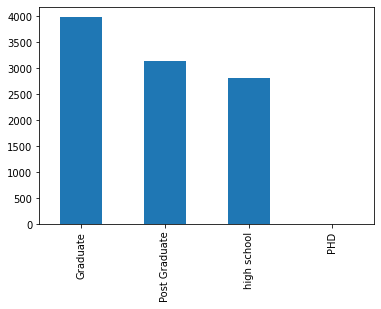

In [532]:
df.Degree.value_counts().plot(kind='bar')

### Source of wealth 

In [533]:
df.isnull().sum()

Name                   0
networth               0
category               0
gender                 0
profile_pic           79
age                    0
DOB                 1013
nationality            0
education              0
marital_status         0
source_of_wealth     189
birth_place          872
personal_details     309
profile_link           0
Degree                 0
dtype: int64

In [534]:
for i in range(len(df)) : 
    if df.source_of_wealth.iloc[i] is np.nan : 
        df.source_of_wealth.iloc[i] = df.category.iloc[i]

    if df.birth_place.iloc[i] is np.nan : 
        df.birth_place.iloc[i] = df.nationality.iloc[i]

    if df.personal_details.iloc[i] is np.nan :
        personal_details_text = str(df.Name.iloc[i]) + ' was a ' + df.category.iloc[i] + ' from ' + df.nationality.iloc[i] +'.'
        if df.gender.iloc[i] is 'Male' :
            personal_details_text += ' His source of wealth is ' + df.source_of_wealth.iloc[i] + ' and his networth is $' + str(df.networth.iloc[i])
        else :
            personal_details_text += ' Her source of wealth is ' + df.source_of_wealth.iloc[i] + ' and her networth is $' + str(df.networth.iloc[i])
        df.personal_details.iloc[i] = personal_details_text

In [535]:
new_row = df.shape[0]
print('new shape {}'.format(new_row))
print('Loss of data : {} %'.format(round(((old_row - new_row)/old_row)*100), 2))

new shape 9935
Loss of data : 51 %


In [536]:
df.isnull().sum()

Name                   0
networth               0
category               0
gender                 0
profile_pic           79
age                    0
DOB                 1013
nationality            0
education              0
marital_status         0
source_of_wealth       0
birth_place            0
personal_details       0
profile_link           0
Degree                 0
dtype: int64

In [537]:
root = '../data/'
df.to_csv(root + 'preprocessed_df.csv', encoding='utf-8', index= False)